In [21]:
import decord
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2

In [22]:
path = '../reference_data/compressed_video_h264.mp4'

In [23]:
vr = decord.VideoReader(path, ctx=decord.cpu(0))
fps = vr.get_avg_fps()
frames = []
for i in range(len(vr)):
    frame = vr[i].asnumpy()
    # draw_marker(frame)
    frames.append(frame)

frames = np.stack(frames, axis=0)

In [24]:
with open('../reference_data/labels.json', 'r') as file:
    data = json.load(file)

In [25]:
gripper_values = set([entry['gripper'] for entry in data.values()])
print(sorted(gripper_values))

[0.0, 0.0069318413734436035, 0.08421701192855835, 0.0955803394317627, 0.14855247735977173, 0.22938060760498047, 0.2922353148460388, 0.3580002188682556, 0.4652842879295349, 0.5339776277542114, 0.5715960264205933, 0.6849027872085571, 0.8023929595947266, 0.8654884696006775, 0.9085422158241272, 0.9119002819061279, 0.912726879119873, 0.9130117297172546, 0.9139216542243958, 0.9151049256324768, 0.9166136384010315, 0.9192516803741455, 0.919630229473114, 0.9196878671646118, 0.9197795391082764, 0.9198099970817566, 0.9198487401008606, 0.9199092984199524, 0.9200048446655273, 0.9201077222824097, 0.9203041195869446, 0.9204419851303101, 0.9206300377845764, 0.9209040999412537, 0.9210985898971558, 0.9211177825927734, 0.9214158654212952, 0.9216369986534119, 0.9218389987945557, 0.9219323396682739, 0.9219772815704346, 0.9220567345619202, 0.9224655628204346, 0.9224738478660583, 0.9230641722679138, 0.923189103603363, 0.9234833121299744, 0.9235513210296631, 0.9238040447235107, 0.9240086078643799, 0.924109578

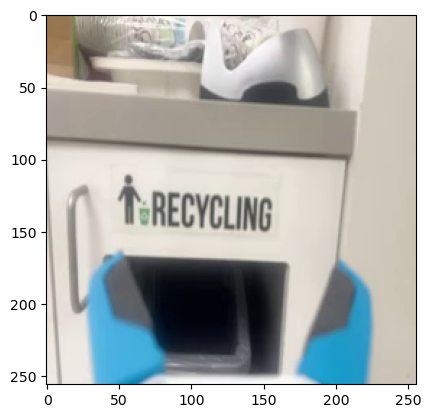

In [26]:
plt.imshow(frames[0])

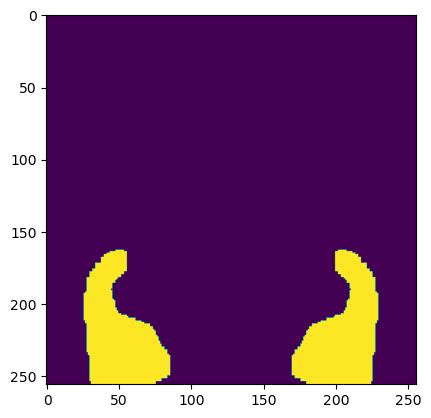

In [27]:
from scipy.ndimage import binary_dilation
hsv = cv2.cvtColor(frames[0], cv2.COLOR_RGB2HSV)
is_blue_hue = (hsv[:, :, 0] < 110) & (hsv[:, :, 0] > 80)
is_saturated = (hsv[:, :, 1] > 60)
is_bright = (hsv[:, :, 2] > 140)
gripper_mask = is_blue_hue & is_saturated & is_bright
gripper_mask = gripper_mask

pixels = 2
structure = np.ones((2 * pixels + 1, 2 * pixels + 1), dtype=bool)
gripper_mask = binary_dilation(gripper_mask.reshape(hsv[:, :, 0].shape), structure)

plt.imshow(gripper_mask | np.flip(gripper_mask, axis=1))

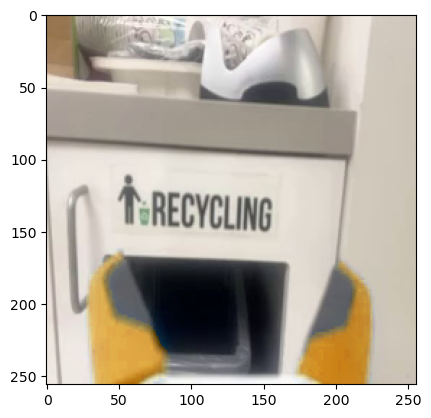

In [28]:
hue_shifted = hsv.copy()
hue_shifted[gripper_mask, 0] -= 80
plt.imshow(cv2.cvtColor(hue_shifted, cv2.COLOR_HSV2RGB))

In [29]:
gripper_hsv = hsv[gripper_mask]

hsv_values = list(set([(c[0], c[1], c[2]) for c in gripper_hsv.reshape((-1, 3))]))
rgb_values = cv2.cvtColor(np.array([hsv_values]), cv2.COLOR_HSV2RGB)[0]
# gripper_rgb = frames[0][gripper_mask]
# rgb_values = list(set([(c[0], c[1], c[2]) for c in gripper_rgb.reshape((-1, 3))]))
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
df = px.data.iris()
fig = px.scatter_3d(hsv_values, x=0, y=1, z=2,
                    color=[f'rgb({c[0]}, {c[1]}, {c[2]})' for c in rgb_values], color_discrete_map="identity"
                    )
fig.update_traces(marker=dict(size=2))

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(hsv[:, 0], hsv[:, 1], hsv[:, 2])
# ax.set_xlabel('Hue')
# ax.set_ylabel('Saturation')
# ax.set_zlabel('Value')
# plt.show()

In [30]:
class GripperMasks:
    pass